In [ ]:
!pip install diffusers transformers onnxruntime-gpu accelerate
!pip install rembg[gpu]

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 113GB/s]


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

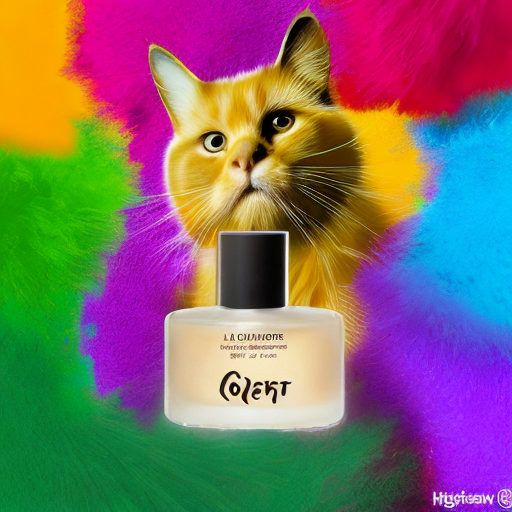

In [4]:
from rembg import remove, new_session
import cv2
import numpy as np
import PIL
import torch
from diffusers import StableDiffusionInpaintPipeline


input_path = 'doldurunuz'
input = cv2.cvtColor(cv2.imread(input_path), cv2.COLOR_BGR2RGB)
mask = remove(input, session=new_session('u2net'), only_mask=True)
mask = cv2.bitwise_not(mask)  # Invert the mask
#plt.imshow(mask)

pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",  #runwayml/stable-diffusion-inpainting
    torch_dtype=torch.float16,
)
pipeline = pipeline.to("cuda")
init_image = PIL.Image.open(input_path).convert("RGB").resize((512, 512))
mask_image = PIL.Image.fromarray(np.uint8(mask)).convert('RGB').resize((512, 512))
prompt = "colorful particles, high resolution, a yellow cat, 8K"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
image